## Exercise 5
## Introduction to Pytorch

Pytorch is a framework for developing deep neural networks. Neural networks are like complex mathematical operations. Various deep learning libraries including Pytorch performs these operations as a math function graph.  

Why use Pytorch?
Imperative Programming: Performs computation as user types it. This provides more flexibility to programmer like: printing values in middle of computation.

Dynamic Computation Graphs: Computational graph structure is generated at runtime. This provides flexibility to change graph structure depending on input data for ex:RNN. Also useful for variable length input and output. 
Dynamic graphs also makes debugging easy as specific line of code fails and we can easily point it out. 
Other deep learning libraries use symbolic programming with clear separation between defining the computation and compiling it. 

Pytorch provides two main features:

a) An n-dimensional Tensor, similar to numpy but can run on GPUs.

In python numpy provides n-dimensional array objects and many functions to operate on these arrays. However numpy cannot utilize GPUs to accelerate its numerical computations. Pytorch Tensors (similar to numpy) can utilize GPUs to accelerate their numeric computations. 

b) Automatic differentiation for building and training neural networks.

Implementation of neural networks using numpy requires implementing the forward and backward pass. This becomes very challenging for the large complex networks. Pytorch uses [automatic differentiations](https://en.wikipedia.org/wiki/Automatic_differentiation) to automate the computation og backward passes in neural networks. In autograd forward pass will define a computational graph. To represent nodes Pytorch uses Variable objects. Variable holds tensors and its gradient. 

For ex: if x a Variable then x.data is a Tensor and x.grad is another Variable holding the gradient of x.

Pytorch also comes with $\textbf{nn}$ package. The $\textbf{nn}$ package serves as the higher level API. It provides a set of Modules, which are equivalent to neural network layers and some common useful loss functions. 

Another important package is $\textbf{optim}$ which provides implementation of commonly used optimization algorithms. In this exercise we will explore all of them in more details. 


## Pytorch Tensor similar to Numpy

We will explore some basic numpy like operations to get an indea of pytorch tensors. To know more please refer to [Pytorch Documentation](http://pytorch.org/docs/0.3.0/torch.html).

In [2]:
import torch
import numpy as np
torch.rand(3,3)


 0.3400  0.2579  0.6087
 0.6561  0.2150  0.4903
 0.2361  0.9067  0.2539
[torch.FloatTensor of size 3x3]

In [2]:
#empty tensor
torch.Tensor(4,3).zero_()


 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 4x3]

In [3]:
# Find size of Tensor
x = torch.rand(3,2)
x.size()

torch.Size([3, 2])

In [20]:
# Addition of two Tensor
x = torch.rand(3,2)
print(x)
y = torch.rand(3,2)
print(y)
print('Sum')
print(x+y)
torch.add(x,y)


 0.9034  0.1009
 0.9856  0.9231
 0.5886  0.1694
[torch.FloatTensor of size 3x2]


 0.3280  0.2952
 0.3754  0.2604
 0.5555  0.4736
[torch.FloatTensor of size 3x2]

Sum

 1.2314  0.3961
 1.3611  1.1835
 1.1441  0.6430
[torch.FloatTensor of size 3x2]




 1.2314  0.3961
 1.3611  1.1835
 1.1441  0.6430
[torch.FloatTensor of size 3x2]

In [17]:
# Slicing
x[:,0]


 0.6314
 0.6112
 0.9198
[torch.FloatTensor of size 3]

In [18]:
# Concatenation
torch.cat((x, y), 0)


 0.6314  0.3378
 0.6112  0.5770
 0.9198  0.2736
 0.7061  0.0956
 0.4282  0.0340
 0.0193  0.2098
[torch.FloatTensor of size 6x2]

In [6]:
# Converting to Numpy 
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [7]:
# Converting from Numpy
arr = np.random.rand(2,3)
torch_arr = torch.from_numpy(arr)
print(type(torch_arr))

<class 'torch.DoubleTensor'>


In [8]:
# Easy Way to switch from CPU to GPU
x = torch.rand(2,3)
# x = x.cuda() #Run only if you've cuda on your notebook

In [9]:
# Matrix Multiplication
x = torch.randn(2,3)
W_x = torch.randn(4,3)
torch.mm(W_x, x.t())


-6.1306 -2.2039
-1.1508  1.1278
 0.4450 -2.0913
-1.1266 -2.4093
[torch.FloatTensor of size 4x2]

In [3]:
# Batch Matrix Multiplication
x = torch.randn(2,2,3)
W_x = torch.randn(2,3,4)
torch.bmm(x,W_x)


(0 ,.,.) = 
  0.2230  0.3383  0.7907  1.2095
  2.8042  1.0420  3.0222  3.2394

(1 ,.,.) = 
 -0.1764 -0.1856 -1.0241  0.4329
  0.0965 -0.7597  2.5347 -1.7972
[torch.FloatTensor of size 2x2x4]

##  Function and Autograd

torch.nn.functional package provides some standard Neural Network Functions. This include some standard layers, non-linearities, loss functions etc. For more details refer to documentation.

Pytorch autograd provides classes and functions implementing automatic differentiation of tensors. Depending on how the graph is defined gradient will be computed using backpropagation. 

autograd.Variable wraps a tensor and support operations defined on it.

Steps for Computational Graph:
1. Initialize variables and tensors and define computational operations. 
2. Use appropriate loss function.
3. Define an optimizer.
4. Do backward propagation.

In [53]:
# Variable, Function and Autograd
from torch.autograd import Variable
import torch.nn.functional as F
x = Variable(torch.Tensor([1.3]), requires_grad=True)
print('gradient of x:', x.grad)
print('Data of x:', x.data)
# Gradient is none because no backward pass yet

gradient of x: None
Data of x: 
 1.3000
[torch.FloatTensor of size 1]



In [54]:
y = (x**2)+2*x-5
y.backward(retain_graph=True)
# Gradients w.r.t Variable is accumulated in .grad
print('gradient of x:', x.grad)
print('Data of x:', x.data)


gradient of x: Variable containing:
 4.6000
[torch.FloatTensor of size 1]

Data of x: 
 1.3000
[torch.FloatTensor of size 1]



In [55]:
x.grad.data.zero_()
z = F.sigmoid(y)
z.backward()
# Gradients w.r.t Variable is accumulated in .grad
print('gradient of x:', x.grad)
print('Data of x:', x.data)

gradient of x: Variable containing:
 1.0164
[torch.FloatTensor of size 1]

Data of x: 
 1.3000
[torch.FloatTensor of size 1]



## Linear Regression

Now let's implement Simple linear regression using pytorch.

In [56]:
import torch
from torch.autograd import Variable

w = Variable(torch.Tensor([1.0]),  requires_grad=True)  # Some Weight

# Forward Pass
def forward(x):
    return x * w

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

x_data = [1.0, 2.0, 3.0, 4.0]
y_data = [2.0, 4.0, 6.0, 8.0]

# Training using Gradient Descent
loss_all = []
for epoch in range(10):
    loss_i = 0
    print('Epoch', epoch)
    for x_i, y_i in zip(x_data, y_data):
        l = loss(x_i, y_i)
        loss_i += l
        l.backward()
        print("x = {} y = {} grad = {} ".format(x_i, y_i, w.grad.data[0]))
        w.data = w.data - 0.01 * w.grad.data
        # Zero the gradients after updating weights
        w.grad.data.zero_()
    loss_all.append(loss_i.data.numpy())
        
# Test
print("Prediction for 12 ", forward(12).data[0])

Epoch 0
x = 1.0 y = 2.0 grad = -2.0 
x = 2.0 y = 4.0 grad = -7.840000152587891 
x = 3.0 y = 6.0 grad = -16.228801727294922 
x = 4.0 y = 8.0 grad = -23.657981872558594 
Epoch 1
x = 1.0 y = 2.0 grad = -1.0054643154144287 
x = 2.0 y = 4.0 grad = -3.941420555114746 
x = 3.0 y = 6.0 grad = -8.15874195098877 
x = 4.0 y = 8.0 grad = -11.893630981445312 
Epoch 2
x = 1.0 y = 2.0 grad = -0.5054793357849121 
x = 2.0 y = 4.0 grad = -1.9814786911010742 
x = 3.0 y = 6.0 grad = -4.101662635803223 
x = 4.0 y = 8.0 grad = -5.979312896728516 
Epoch 3
x = 1.0 y = 2.0 grad = -0.2541208267211914 
x = 2.0 y = 4.0 grad = -0.9961538314819336 
x = 3.0 y = 6.0 grad = -2.062039375305176 
x = 4.0 y = 8.0 grad = -3.0059967041015625 
Epoch 4
x = 1.0 y = 2.0 grad = -0.12775492668151855 
x = 2.0 y = 4.0 grad = -0.5007991790771484 
x = 3.0 y = 6.0 grad = -1.0366544723510742 
x = 4.0 y = 8.0 grad = -1.5112113952636719 
Epoch 5
x = 1.0 y = 2.0 grad = -0.06422638893127441 
x = 2.0 y = 4.0 grad = -0.2517671585083008 
x = 

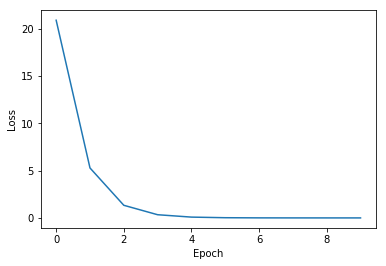

In [57]:
import matplotlib.pyplot as plt

plt.plot(loss_all)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Linear Regression using Pytorch Optimizer and NN

In [58]:
import torch
from torch.autograd import Variable

class LinearRegression(torch.nn.Module):

    def __init__(self, n_in=1, n_out=1):
        """
        In the constructor we instantiate two nn.Linear module
        n_in : Number of Input
        n_out: Number of Output
        """
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(n_in, n_out) 

    def forward(self, x):
        """
        Accept a Variable of input data and return a Variable of output data. 
        """
        x = Variable(torch.from_numpy(x)).view(-1,1)
        y_pred = self.linear(x)
        return y_pred
    
    def loss(self, x, y):
        y = Variable(torch.from_numpy(y))
        loss = torch.nn.MSELoss(size_average=False)
        #loss = torch.nn.BCELoss(size_average=True) # For Classification
        return loss(x,y)

x_data = np.array([1.0,2.0,3.0,4.0], dtype='float32')
y_data = np.array([2.0,4.0,6.0,8.0], dtype='float32')

# Linear Regression Model
n_in = 1
n_out = 1
model = LinearRegression(n_in, n_out)

# Construct loss function
criterion = torch.nn.MSELoss(size_average=False)
# Define an Optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# model.parameters(): contain the learnable parameters.
# Training
loss_all = []
for epoch in range(10):
    y_pred = model.forward(x_data)
    # Compute and print loss
    loss = model.loss(y_pred, y_data)
    loss_all.append(loss.data[0])
    print(epoch, loss.data[0])
    # Backward pass and weight updation.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
print("Prediction for 12", model.forward(np.array([12.0], dtype='float32')).data.numpy()[0][0])

0 303.9129638671875
1 33.49495315551758
2 3.692748546600342
3 0.4082794785499573
4 0.04627445340156555
5 0.006348391063511372
6 0.0019184800330549479
7 0.0014012448955327272
8 0.0013159103691577911
9 0.001278853276744485
Prediction for 12 23.8663


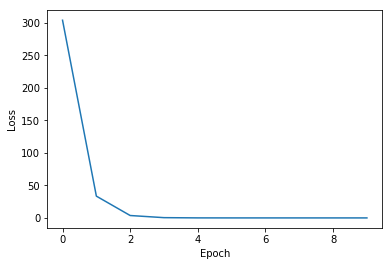

In [59]:
import matplotlib.pyplot as plt

plt.plot(loss_all)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## 5.1 Linear Regression for non linear data

Similar to Exercise 3 Generate polynomial features and fit linear regression model. 


In [60]:
#####################
### Your Code Here
#####################


## 5.2 Implement XOR function

In [61]:
#####################
### Your Code Here
#####################

## 5.3 Multilayer Perceptron

a) Use below defined MLP class evaluate it against mnist dataset. Dataset can be downloaded using pytorch datautils or separetly from: http://yann.lecun.com/exdb/mnist/.
Use accuracy as the evaluation measure and also plot the confusion matrix.

b) Extract representation after second hidden layer and do the visualization using t-sne(discussed in last exercise). 

c) Repeat (a) with two different optimizers: adam, rmsprop.

In [64]:
import torch.nn as nn
# Defining a simple MLP
class MLP(nn.Module):
    def __init__(self, n_in, n_hidden_1, n_hidden_2, n_out):
        super(MLP, self).__init__()
        self.n_in = n_in
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_out = n_out

        self.fc1 = nn.Linear(self.n_in, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, self.n_out)

        self.loss = nn.CrossEntropyLoss()
    def forward(self, x, target):
        x = x.view(-1, self.n_in)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        ll = self.loss(x, target)
        return x, ll

## Extending Pytorch with custom modules

In [66]:
# Code Taken from: https://github.com/jcjohnson/pytorch-examples#pytorch-variables-and-autograd
import torch
from torch.autograd import Variable

class MyReLU(torch.autograd.Function):
  """
  We can implement our own custom autograd Functions by subclassing
  torch.autograd.Function and implementing the forward and backward passes
  which operate on Tensors.
  """
  def forward(self, input):
    """
    In the forward pass we receive a Tensor containing the input and return a
    Tensor containing the output. You can cache arbitrary Tensors for use in the
    backward pass using the save_for_backward method.
    """
    self.save_for_backward(input)
    return input.clamp(min=0)

  def backward(self, grad_output):
    """
    In the backward pass we receive a Tensor containing the gradient of the loss
    with respect to the output, and we need to compute the gradient of the loss
    with respect to the input.
    """
    input, = self.saved_tensors
    grad_input = grad_output.clone()
    grad_input[input < 0] = 0
    return grad_input

relu = MyReLU()
x = Variable(torch.randn(3, 2).type(torch.FloatTensor), requires_grad=False)
w1 = Variable(torch.randn(2, 5).type(torch.FloatTensor), requires_grad=False)

# Forward pass: compute predicted y using operations on Variables; we compute
# ReLU using our custom autograd operation.
relu(x.mm(w1))

Variable containing:
 0.2524  1.0743  1.0326  0.4998  2.1467
 0.2060  0.8692  0.8237  0.4249  1.7448
 0.0000  0.0000  0.0000  0.0000  0.0000
[torch.FloatTensor of size 3x5]

## References:

1. http://pytorch.org/docs/0.3.0/
